In [79]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
from qiskit_aer.utils import insert_noise
from pyqsp.angle_sequence import angle_sequence
from qiskit.quantum_info import Kraus
from qiskit_aer.noise import NoiseModel,depolarizing_error
deg = 30

In [80]:
def getChebyshevCoeffs(deg):
    l = np.zeros(deg+1)
    l[-1] = 1
    return np.polynomial.Polynomial(np.polynomial.chebyshev.cheb2poly(l))

def getChebyshevAngles(deg):
    l = np.zeros(deg+1)
    l[-1] = 1
    return angle_sequence(l, eps=1e-4, suc=1-1e-4)
    
def QSP_circuit(angles):
    x = Parameter('x')
    qc = QuantumCircuit(1)
    for i,v in enumerate(angles[::-1]):
        qc.rz(-2 * v, 0)
        if(i < len(angles)-1):
            qc.rx(-np.arccos(x) * 2, 0 )
    return qc

def get_Kraus(circuit, noise_model):
    return Kraus(insert_noise(circuit,noise_model))

def get_expectation(Kraus):
    rho = np.zeros((2,2),dtype='complex128')
    for i in Kraus.data:
        rho += i.dot(np.array([[1,0],[0,0]])).dot(i.conjugate().T)
    return rho[0][0]

In [89]:
from qiskit.quantum_info import Statevector
y1 = []
y2 = []
y3 = []
angles=getChebyshevAngles(deg)
for x in np.linspace(-1,1,250):
    y1.append(Statevector(QSP_circuit(angles[::-1]).assign_parameters([x])).data[0])
    y2.append(Statevector(QSP_circuit(angles).assign_parameters([x])).data[0])
    y3.append(Statevector(QSP_circuit(np.zeros(deg+1)).assign_parameters([x])).data[0])

Completion part finished within time  0.009917259216308594
Decomposition part finished within time  0.08494997024536133
Final error = 4.999999999972304e-05


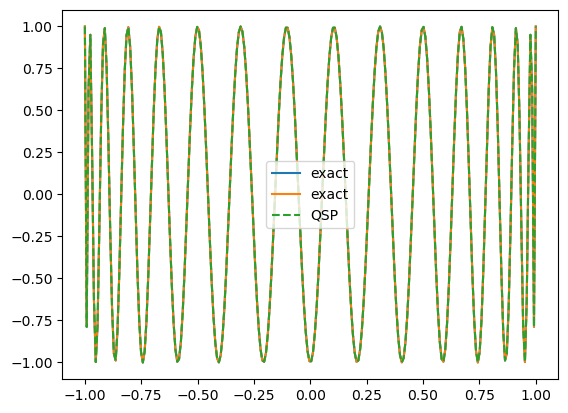

In [82]:
plt.plot(np.linspace(-1,1,250),np.array(y1).real,label='exact')
plt.plot(np.linspace(-1,1,250),np.array(y2).real,label='exact')

plt.plot(np.linspace(-1,1,250),getChebyshevCoeffs(deg)(np.linspace(-1,1,250)),'--',label='QSP')
plt.legend()

In [92]:
np.max(np.array(y1)-getChebyshevCoeffs(deg)(np.linspace(-1,1,250)))

(5.046105310224647e-05-0.00783295978120231j)

In [93]:
np.max(np.array(y2)-getChebyshevCoeffs(deg)(np.linspace(-1,1,250)))

(5.0461053102135445e-05-0.007832959781202305j)

In [94]:
np.max(np.array(y3)-getChebyshevCoeffs(deg)(np.linspace(-1,1,250)))

(1.0849944255264532e-06+0j)

In [28]:
from qiskit.quantum_info import Statevector
angles=getChebyshevAngles(deg)
N = 101
y_data = [[] for i in range(N)]
p_list = np.linspace(0.001,0.1,N)
for i,p in enumerate(p_list):
    for x in np.linspace(-1,1,250):
        noise_model = NoiseModel()
        error = depolarizing_error(p, 1)
        noise_model.add_all_qubit_quantum_error(error, ['rx','rz'])
        y_data[i].append(get_expectation(get_Kraus(QSP_circuit(angles).assign_parameters([x]), noise_model)))    
    print(i)

Completion part finished within time  0.0
Decomposition part finished within time  0.016133546829223633
Final error = 4.999999999994198e-05
0
1
2
3
4


KeyboardInterrupt: 

In [ ]:
colors = plt.cm.inferno(np.inspace(0,1,N))
for i,p in enumerate(p_list)
    plt.plot(np.linspace(-1,1,250),np.array(y_data[i]).real,color = colors[-i])
plt.plot(nplinspace(-1,1,250),getChebyshevCoeffs(deg)(np.linspace(-1,1,250))**2,'--',label='exact',color='black')
plt.legend()

In [ ]:
len(angles)

In [ ]:
deg

In [29]:
new_angles = [angles[0]+angles[-1]+(deg-1)*np.pi/2]
for i in angles[2:]:
    new_angles.append(i-np.pi/2)
new_angles = np.array(new_angles)

In [34]:
def QSP_Rcircuit(angles):
    x = Parameter('x')
    qc = QuantumCircuit(1)
    for i,v in enumerate(angles[::-1]):
        qc.rz(np.pi/2,0)
        qc.rx(-np.arccos(x) * 2, 0 )
        qc.rz(-np.pi/2,0)
        qc.rz(-2 * v, 0)
    return qc

In [35]:
y = []
for x in np.linspace(-1,1,250):
    y.append(Statevector(QSP_Rcircuit(new_angles).assign_parameters([x])).data[0])

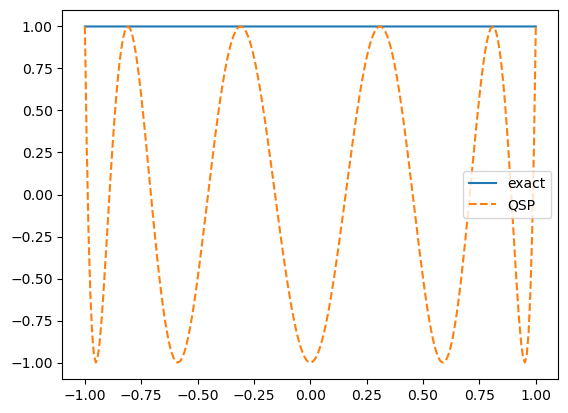

In [36]:
plt.plot(np.linspace(-1,1,250),np.array(y).real,label='exact')

plt.plot(np.linspace(-1,1,250),getChebyshevCoeffs(deg)(np.linspace(-1,1,250)),'--',label='QSP')
plt.legend()

In [39]:
QSP_Rcircuit(new_angles).draw()

┌─────────┐┌──────────────────┐┌──────────┐┌────────────┐┌─────────┐»
q: ┤ Rz(π/2) ├┤ Rx(-2.0*acos(x)) ├┤ Rz(-π/2) ├┤ Rz(3.1316) ├┤ Rz(π/2) ├»
   └─────────┘└──────────────────┘└──────────┘└────────────┘└─────────┘»
«   ┌──────────────────┐┌──────────┐┌────────────┐┌─────────┐»
«q: ┤ Rx(-2.0*acos(x)) ├┤ Rz(-π/2) ├┤ Rz(3.1451) ├┤ Rz(π/2) ├»
«   └──────────────────┘└──────────┘└────────────┘└─────────┘»
«   ┌──────────────────┐┌──────────┐┌───────────┐┌─────────┐»
«q: ┤ Rx(-2.0*acos(x)) ├┤ Rz(-π/2) ├┤ Rz(3.149) ├┤ Rz(π/2) ├»
«   └──────────────────┘└──────────┘└───────────┘└─────────┘»
«   ┌──────────────────┐┌──────────┐┌────────────┐┌─────────┐»
«q: ┤ Rx(-2.0*acos(x)) ├┤ Rz(-π/2) ├┤ Rz(3.1425) ├┤ Rz(π/2) ├»
«   └──────────────────┘└──────────┘└────────────┘└─────────┘»
«   ┌──────────────────┐┌──────────┐┌───────────┐┌─────────┐»
«q: ┤ Rx(-2.0*acos(x)) ├┤ Rz(-π/2) ├┤ Rz(3.129) ├┤ Rz(π/2) ├»
«   └──────────────────┘└──────────┘└───────────┘└─────────┘»
«   ┌──────────────────┐┌──────────┐┌───────────┐┌─────────┐»
«q: ┤ Rx(-2.0*acos(x)) ├┤ Rz(-π/2) ├┤ Rz(3.147) ├┤ Rz(π/2) ├»
«   └──────────────────┘└──────────┘└───────────┘└─────────┘»
«   ┌──────────────────┐┌──────────┐┌────────────┐┌─────────┐»
«q: ┤ Rx(-2.0*acos(x)) ├┤ Rz(-π/2) ├┤ Rz(3.1381) ├┤ Rz(π/2) ├»
«   └──────────────────┘└──────────┘└────────────┘└─────────┘»
«   ┌──────────────────┐┌──────────┐┌────────────┐┌─────────┐»
«q: ┤ Rx(-2.0*acos(x)) ├┤ Rz(-π/2) ├┤ Rz(3.1482) ├┤ Rz(π/2) ├»
«   └──────────────────┘└──────────┘└────────────┘└─────────┘»
«   ┌──────────────────┐┌──────────┐┌────────────┐┌─────────┐»
«q: ┤ Rx(-2.0*acos(x)) ├┤ Rz(-π/2) ├┤ Rz(3.1503) ├┤ Rz(π/2) ├»
«   └──────────────────┘└──────────┘└────────────┘└─────────┘»
«   ┌──────────────────┐┌──────────┐┌─────────┐
«q: ┤ Rx(-2.0*acos(x)) ├┤ Rz(-π/2) ├┤ Rz(-9π) ├
«   └──────────────────┘└──────────┘└─────────┘